<a href="https://colab.research.google.com/github/brendabo1/ResTIC36/blob/main/cnn_face_sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Dropout, Input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

In [ ]:
import numpy as np
import tensorflow as tf
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import collections

In [ ]:
import os

!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
100% 113M/113M [00:01<00:00, 66.7MB/s] 
100% 113M/113M [00:02<00:00, 57.2MB/s]


In [ ]:
print(files_in_photos)
print(len(files_in_photos))

['m1-011-01.jpg', 'm-039-01.jpg', 'm-065-01.jpg', 'm1-037-01.jpg', 'm-044-01.jpg', 'f1-004-01.jpg', 'm1-039-01.jpg', 'm-038-01.jpg', 'm-099-01.jpg', 'm1-005-01.jpg', 'm-016-01.jpg', 'm1-007-01.jpg', 'm-073-01.jpg', 'f-043-01.jpg', 'f-010-01.jpg', 'm-015-01.jpg', 'm-085-01.jpg', 'm-034-01.jpg', 'm1-028-01.jpg', 'm-049-01.jpg', 'm-091-01.jpg', 'm1-036-01.jpg', 'm-018-01.jpg', 'm-077-01.jpg', 'f-033-01.jpg', 'm-097-01.jpg', 'm-095-01.jpg', 'm-031-01.jpg', 'f-027-01.jpg', 'm-027-01.jpg', 'm-025-01.jpg', 'f-018-01.jpg', 'f1-011-01.jpg', 'f-024-01.jpg', 'm-089-01.jpg', 'f1-012-01.jpg', 'm-096-01.jpg', 'f-026-01.jpg', 'm1-023-01.jpg', 'm-041-01.jpg', 'f-039-01.jpg', 'm-010-01.jpg', 'f1-007-01.jpg', 'm-071-01.jpg', 'f1-001-01.jpg', 'm1-017-01.jpg', 'm-069-01.jpg', 'f-008-01.jpg', 'm-014-01.jpg', 'm-075-01.jpg', 'f1-010-01.jpg', 'm-052-01.jpg', 'm-061-01.jpg', 'm-019-01.jpg', 'f-022-01.jpg', 'm1-024-01.jpg', 'm-050-01.jpg', 'm-029-01.jpg', 'm1-038-01.jpg', 'f-005-01.jpg', 'm-037-01.jpg', 'm1-01

(250, 200, 3)

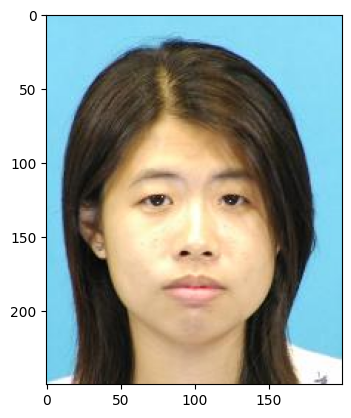

In [ ]:
def exibir_imagens(lista_nomes):
  for img_name in lista_nomes:
    print(img_name)
    img_path = f"photos/{img_name}"
    img = image.load_img(img_path)
    plt.imshow(img)

img_path = f"photos/f-010-01.jpg"
img = image.load_img(img_path)
plt.imshow(img)
cv2.imread("photos/f-010-01.jpg").shape
# exibir_imagens(image_names_ordenado)
# img_array = []


### Preparação das imagens

In [ ]:
img_array = []
genero = []
ALTURA = 250
LARGURA = 200

for img_name in tqdm(files_in_photos):
    genero_label = 1 if img_name.startswith('f') else 0  # 0- masculino 1-feminino
    img = "photos" +  "/" + img_name
    img = cv2.imread(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (ALTURA, LARGURA))
    img = img.astype('float32')/255  #normalizando imagens

    # img_array.append(img_to_array(img))
    genero.append(genero_label)
    img_array.append(np.array(img))
    #np.concat

    ## Criando Novos Dados
    img1 = cv2.flip(img, 1)  # Transformação horizontal Ascendente
    img_array.append(np.array(img1))
    genero.append(genero_label)

    # img2 = cv2.flip(img, -1) # Transformação vertical Descendente
    # img_array.append(np.array(img2))
    # genero.append(genero_label)

    # img3 = cv2.flip(img2, 1) # Transformação horizontal Descendente
    # img_array.append(np.array(img3))
    # genero.append(genero_label)

    # img4 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) # Rotação 90° sentido horario
    # img_array.append(np.array(img4))
    # genero.append(genero_label)

    # img5 = cv2.flip(img4, 1) # Rotação 270° sentido horario
    # img_array.append(np.array(img5))
    # genero.append(genero_label)

    # img6 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # Rotação 90° sentido anti horario
    # img_array.append(np.array(img6))
    # genero.append(genero_label)

    # img7 = cv2.flip(img, 1) # Rotação 270° sentido anti horario
    # img_array.append(np.array(img7))
    # genero.append(genero_label)

print("Total de imagens e rotulos:",len(img_array), len(genero))

100%|██████████| 188/188 [00:00<00:00, 555.56it/s]

Total de imagens e rotulos: 376 376


In [ ]:
img_array = []
genero = []
ALTURA = 250
LARGURA = 200

target_size = (250, 200)  # (altura, largura)

for img_name in tqdm(files_in_photos):
    genero_label = 1 if img_name.startswith('f') else 0  # 0 - masculino, 1 - feminino
    img_path = f"photos/{img_name}"
    img = cv2.imread(img_path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Aumentação de dados
    transformadas = [img]  # Adicionar a original
    transformadas.append(cv2.flip(img, 1))  # Flip horizontal
    transformadas.append(cv2.flip(img, 0))  # Flip vertical
    transformadas.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))  # Rotação 90° horário
    transformadas.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE))  # Rotação 90° anti-horário

    for img_aug in transformadas:
        img_aug = cv2.resize(img_aug, target_size)
        img_array.append(img_to_array(img_aug))
        genero.append(genero_label)

try:
    images = np.array(img_array)
    genero = np.array(genero)
    print("Formato das imagens:", images.shape)
except Exception as e:
    print("Erro ao converter para numpy array:", e)

print("Total de imagens e rótulos:", images.shape[0], len(genero))
# Verificando as formas
# for i, img in enumerate(img_array):
#     print(f"Imagem {i} - Forma: {img.shape}")


100%|██████████| 188/188 [00:00<00:00, 238.16it/s]


Formato das imagens: (940, 200, 250, 3)
Total de imagens e rótulos: 940 940


## Dividindo o Dataset


* 50% para o conjunto de treinamento,
* 30% para o conjunto de validação
* 20% para o conjunto de teste: reservado para avaliar o desempenho final do modelo.Item de lista


In [ ]:
# Dividindo o dataset de treino em treino e validação de forma balanceada
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp  = train_test_split(images, genero, test_size=0.5, random_state=23, stratify=genero)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.4, random_state=23, stratify=y_train)


# Checando quantidade de imagens do dataset
print('Quantidade de imagens de treino:', x_train.shape[0])
print('Quantidade de imagens de validação:', x_val.shape[0])
print('Quantidade de imagens de test:', x_test.shape[0])

print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_val), x_val.shape)
print(type(y_val), y_val.shape)

# Contando quantidade de imagens por categoria (masculino/feminino)
generos = ['Masculino', 'Feminino']

counterTrain=collections.Counter(y_train)
counterVal=collections.Counter(y_val)
counterTest=collections.Counter(y_test)

print(f"\nDistribuição no conjunto de treino: Masculino - {dict(counterTrain)[0]}, Feminino - {dict(counterTrain)[1]}")
print(f"Distribuição no conjunto de validação: Masculino - {dict(counterVal)[0]}, Feminino - {dict(counterTest)[1]}")
print(f"Distribuição no conjunto de teste: Masculino - {dict(counterTest)[0]}, Feminino- {dict(counterTest)[1]}")

# Plotando quantidade de imagens de cada genero
# fig, ax = plt.subplots()
# rects1 = ax.bar(counterTrain.keys(), counterTrain.values(), label='Treino')
# rects2 = ax.bar(counterVal.keys(), counterVal.values(), label='Validação')
# rects3 = ax.bar(counterTest.keys(), counterTest.values(), label='Teste')

# ax.set_title('Imagens por gênero')
# ax.set_ylabel('Quantidade de imagens')
# ax.set_xlabel('Gênero')
# ax.legend()
# plt.show()

Quantidade de imagens de treino: 470
Quantidade de imagens de validação: 282
Quantidade de imagens de test: 188
<class 'numpy.ndarray'> (470, 200, 250, 3)
<class 'numpy.ndarray'> (470,)
<class 'numpy.ndarray'> (282, 200, 250, 3)
<class 'numpy.ndarray'> (282,)

Distribuição no conjunto de treino: Masculino - 335, Feminino - 135
Distribuição no conjunto de validação: Masculino - 201, Feminino - 54
Distribuição no conjunto de teste: Masculino - 134, Feminino- 54


In [ ]:
# Formatando o dataset para funcionar como entrada do Keras

x_train = x_train.reshape(x_train.shape[0], 200, 250, 3)
x_val = x_val.reshape(x_val.shape[0], 200, 250, 3)
x_test = x_test.reshape(x_test.shape[0], 200, 250, 3)

# Convertento valores dos pixels para float (garantindo precisão em operações de divisão por exemplo)
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

# Normalizando os valores dos pixels (valores entre 0 e 1).
x_train /= 255
x_val /= 255
x_test /= 255

In [ ]:
# Inicializando a CNN

model = Sequential()
input_shape = (200, 250, 3)

# Comvolução com filtro 3x3
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
# Camada densa
#model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output
# model.add(Dense(2,activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 198, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 99, 124, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 99, 124, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 97, 122, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 48, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 48, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 46, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 23, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 23, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 21, 27, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 10, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 10, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 8, 11, 512)          │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 4, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 4, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 10240)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │       5,243,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,812,481 (25.99 MB)

 Trainable params: 6,812,481 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True, verbose=0)

# Efetuando o treinamento de 10 épocas com o dataset de treino e validando no dataset de validação
history = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=30, batch_size=16, shuffle=False, callbacks=[early_stoping,learning_rate_reduction])


# Plotando o histórico de treino

# Histórico de acurácia
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Acurácia do modelo no treino e validação')
# plt.ylabel('Acurácia')
# plt.xlabel('Época')
# plt.legend(['Treino', 'Validação'], loc='upper left')
# plt.show()

# # Histórico da função de perda
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Perda do modelo no treino e validação')
# plt.ylabel('Perda')
# plt.xlabel('Época')
# plt.legend(['Treino', 'Validação'], loc='upper left')
# plt.show()


Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.7161 - loss: 0.5861 - val_accuracy: 0.7128 - val_loss: 0.5703 - learning_rate: 0.0010
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.7161 - loss: 0.5693 - val_accuracy: 0.7128 - val_loss: 0.5401 - learning_rate: 0.0010
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.7325 - loss: 0.5042 - val_accuracy: 0.7837 - val_loss: 0.4714 - learning_rate: 0.0010
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.7985 - loss: 0.4295 - val_accuracy: 0.8262 - val_loss: 0.4195 - learning_rate: 0.0010
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.8371 - loss: 0.3970 - val_accuracy: 0.8262 - val_loss: 0.4535 - learning_rate: 0.0010
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8533 - loss: 0.3536
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
30/30 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.8536 - loss: 0.3541 - val_accuracy